## Downloading dataset from Kaggle

In [6]:
# installing kaggle library
!pip install kaggle

In [7]:
# configuring path of kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
# API to fetch dataset from Kaggle
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 98% 79.0M/80.9M [00:03<00:00, 32.2MB/s]
100% 80.9M/80.9M [00:03<00:00, 23.6MB/s]


In [9]:
# extracting .zip file
from zipfile import ZipFile
f = '/content/sentiment140.zip'

with ZipFile(f, 'r') as zf:
    zf.extractall()
    print('Extracted Successfully')

Extracted Successfully


In [10]:
# renaming the extracted file
import os
cur = '/content/training.1600000.processed.noemoticon.csv'
new = '/content/twitterDataset.csv'
os.rename(cur, new)

## Importing Libraries

In [11]:
# data manipulation
import pandas as pd
import numpy as np
import re

# text processing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# visualization
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# metrics
from sklearn.metrics import classification_report, confusion_matrix

# time
import time

# warnings
import warnings
warnings.filterwarnings('ignore')

# save model
import pickle

In [12]:
# stopword set
import nltk
nltk.download('punkt')

nltk.download('stopwords')
stopwordEng = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
print('Stop List:\n', stopwordEng)

Stop List:
 {'those', "wouldn't", 'we', 'haven', 'what', 'who', "wasn't", 'didn', 'am', 'your', 'whom', 'while', 'for', 'up', 'few', 'further', 'before', 'at', 'such', 'ain', "didn't", 'hasn', 'y', 'having', 'more', 'below', 'it', 'against', 'so', "you'd", 'or', 'needn', 'from', 'both', 'doesn', "hadn't", 'about', 'ours', 'over', 'where', 'do', "isn't", 'you', 'as', 'mustn', 'down', "that'll", 'can', 'above', 'her', 'very', "won't", "couldn't", 'here', 'some', 'should', "doesn't", 'i', 'between', 'my', 'until', 'during', 'him', 'themselves', 'he', 'off', 'nor', 'just', 'if', "should've", 'doing', 'me', 'not', 'herself', 'which', 'the', 'too', "shan't", 'is', 'was', 'most', 'on', "don't", 'again', 'were', 'she', 'them', 'same', "mightn't", 'out', 'into', 'will', 'have', 'shan', 'been', 'yourself', 'but', 'our', "needn't", "haven't", 'isn', 't', "mustn't", 'these', 'each', 'once', 's', 've', 'shouldn', 'under', "it's", 'll', 'with', 'only', 'wasn', 'did', 'all', 'their', 'they', 'to', 'o

## Loading Dataset

In [14]:
cols = ['sentiment', 'ids', 'date', 'flag', 'user', 'tweet']
df = pd.read_csv('/content/twitterDataset.csv',names=cols, encoding='ISO-8859-1')

In [15]:
df.head()

,sentiment,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [16]:
df.sample(5)

,sentiment,ids,date,flag,user,tweet
487785,0,2182271426,Mon Jun 15 12:57:07 PDT 2009,NO_QUERY,generositus,I'm really really really hoping the bike shop ...
90103,0,1755663894,Sun May 10 09:42:46 PDT 2009,NO_QUERY,inaccuratemap,@recordskip it says it's a protected entry an...
684259,0,2250486665,Sat Jun 20 00:39:09 PDT 2009,NO_QUERY,Mhaey,I will miss you Crook! But you have to stay wi...
1576599,4,2189563814,Tue Jun 16 00:20:06 PDT 2009,NO_QUERY,ebbs10,loving no schoooool!..lots of sleepp &amp; not...
1039229,4,1956784232,Thu May 28 22:40:55 PDT 2009,NO_QUERY,Nazy1105,@WerdUp Trying to...Fred said you guys got the...


## EDA

In [ ]:
# column names
df.columns

Index(['sentiment', 'ids', 'date', 'flag', 'user', 'tweet'], dtype='object')

In [ ]:
# total records in dataset
len(df)

1600000

In [ ]:
# shape of data
df.shape

(1600000, 6)

In [ ]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
# data-type of columns
print(df.dtypes)

sentiment     int64
ids           int64
date         object
flag         object
user         object
tweet        object
dtype: object


In [ ]:
# missing values
print(df.isnull().sum())

sentiment    0
ids          0
date         0
flag         0
user         0
tweet        0
dtype: int64


In [ ]:
# unique target values
print("no. of unique values of the target variable: {}".format(df['sentiment'].nunique()))
print("unique values of target variable are {0} and {1}".format(df['sentiment'].unique()[0],df['sentiment'].unique()[1]))

no. of unique values of the target variable: 2
unique values of target variable are 0 and 4


*   0 for Negative
*   4 for positive

In [ ]:
# unique ids
df['ids'].nunique()

1598315

In [ ]:
# unique user
df['user'].nunique()

659775

In [ ]:
# unique tweets
df['tweet'].nunique()

1581466

In [ ]:
# duplicate rows
df.duplicated().sum()

0

sentiment
0    800000
4    800000
Name: count, dtype: int64


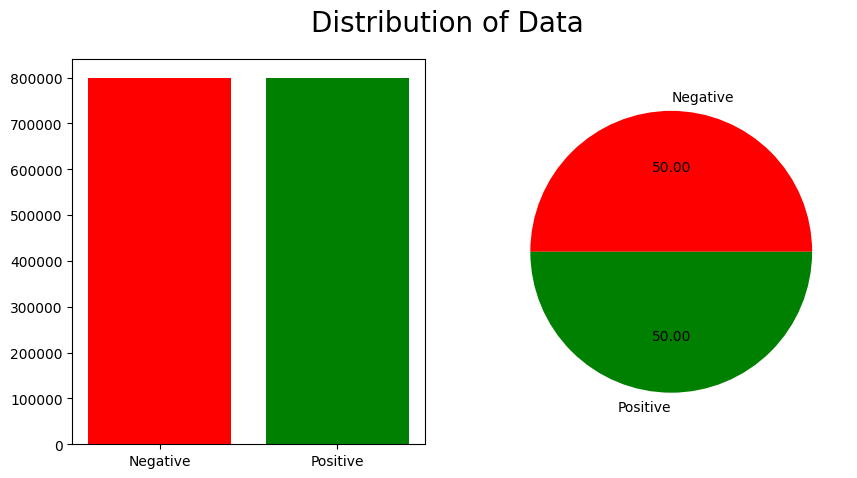

In [ ]:
# visualizing data distribution
valCount = df['sentiment'].value_counts()
print(valCount)

f, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(['Negative', 'Positive'], valCount, color=['red', 'green'])

axs[1].pie(valCount, labels=['Negative', 'Positive'], autopct='%0.2f', colors=['red', 'green'])
f.suptitle('Distribution of Data', fontsize=20)
plt.show()

## Text preprocessing

In [17]:
# removing unnecessary columns
df = df[['sentiment','tweet']]

In [ ]:
df.shape

(1600000, 2)

In [18]:
# replacing rentiment 4 by 1
df.replace({'sentiment':{4:1}}, inplace=True)

In [ ]:
df.sample(5)

,sentiment,tweet
233501,0,"... peanut butter brownies, blueberry bagels, ..."
255936,0,Can't find Angel
111622,0,I'm so tired so tired so tired so tired god I ...
974887,1,Enjoy my new desk
339842,0,I hate projects. Ugh. I'm so sleepy


*   0 for Negative
*   1 for positive

In [19]:
# creating stemmer
stemmer = PorterStemmer()

# defining regex patterns
url = r'((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)'
user = r'@[^\s]+'
alpha = r'[^a-zA-Z]'
seq = r'(.)\1\1+'
seqReplace = r'\1\1'

In [20]:
def preprocessData(text):
    # lowercasing
    text = text.lower()

    # removing URL's
    text = re.sub(url, ' ', text)

    # removing mentions @USER
    text = re.sub(user, ' ', text)

    # remove all non alphabets
    text = re.sub(alpha, ' ', text)

    # replace more than 2 consecutive letters by 2 letters
    text = re.sub(seq, seqReplace, text)

    # remove extra whitespaces
    text = text.strip()
    text = re.sub(r' +', ' ', text)

    tokens = []

    for word in word_tokenize(text):
        # if word not in stopwordEng:
        tokens.append(stemmer.stem(word))   # stemming

    return ' '.join(tokens)

In [ ]:
# checking the preprocessData function
df.loc[100, 'tweet']

' Body Of Missing Northern Calif. Girl Found: Police have found the remains of a missing Northern California girl .. http://tr.im/imji'

In [ ]:
preprocessData(df.loc[100, 'tweet'])

'bodi of miss northern calif girl found polic have found the remain of a miss northern california girl'

In [ ]:
df.loc[1547900, 'tweet']

'@Tastelikecrazy yep. mine too, probably my least favorite part of being a dad '

In [ ]:
preprocessData(df.loc[1547900, 'tweet'])

'yep mine too probabl my least favorit part of be a dad'

In [ ]:
df.loc[686962, 'tweet']

'oh my goodness..my legs hurt so badddd  '

In [ ]:
preprocessData(df.loc[686962, 'tweet'])

'oh my good my leg hurt so badd'

In [21]:
# processing twees and adding to df
df['newTweet'] = df['tweet'].apply(preprocessData)
print('Data preprocessing completed successfully')

Data preprocessing completed successfully


In [ ]:
df.sample(5)

,sentiment,tweet,newTweet
1467947,1,"YAY, i have some lovely energy drinks on my de...",yay i have some love energi drink on my desk r...
262228,0,@Societyreject damnit i wish i could but i got...,damnit i wish i could but i got to wake up earli
663367,0,Well heck.. No 6th hour of CSI. This must be ...,well heck no th hour of csi thi must be the on...
859086,1,@Northlandfox,
1472011,1,on my way to the store...with my Lucas,on my way to the store with my luca


In [22]:
# removing duplicate transformed tweets
print("no. unique values of the newTweet: {}".format(df['newTweet'].nunique()))
print("no. of rows in dataframe: {}".format(len(df)))
print("no. of duplicated rows in dataframe: {}".format(len(df)-df['newTweet'].nunique()))

no. unique values of the newTweet: 1515614
no. of rows in dataframe: 1600000
no. of duplicated rows in dataframe: 84386


In [23]:
# Removing duplicate rows but keeping first duplicate
df = df.drop_duplicates(subset='newTweet', keep='first')

In [24]:
# checking if duplicates have been removed
print("no. unique values of the newTweet: {}".format(df['newTweet'].nunique()))
print("no. of rows in dataframe: {}".format(len(df)))
print("no. of duplicated rows in dataframe: {}".format(len(df)-df['newTweet'].nunique()))

no. unique values of the newTweet: 1515614
no. of rows in dataframe: 1515614
no. of duplicated rows in dataframe: 0


## Data Visualization after Preprocessing

In [ ]:
df.shape

(1515614, 3)

In [ ]:
# word cloud
wc = WordCloud(max_words=1500,width=1600, height=800, min_font_size=10, background_color='white')

For Negative Sentiment

[]

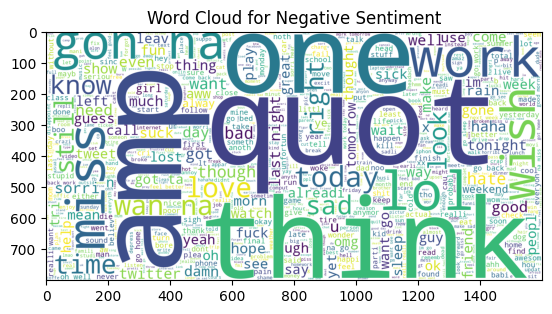

In [ ]:
negWC = wc.generate(df[df['sentiment']==0]['newTweet'].str.cat(sep=' '))
plt.imshow(negWC)
plt.title('Word Cloud for Negative Sentiment')
plt.plot()

In [ ]:
# most common 30 words in -ve tweets
negWords = nltk.FreqDist(w for t in df[df['sentiment']==0]['newTweet'] for w in t.split())
negWords.most_common(30)

[('go', 76796),
 ('get', 60541),
 ('work', 54416),
 ('day', 50649),
 ('miss', 44276),
 ('like', 42536),
 ('want', 38243),
 ('got', 38236),
 ('today', 37338),
 ('feel', 34781),
 ('back', 32244),
 ('time', 31367),
 ('realli', 30687),
 ('im', 30154),
 ('one', 28584),
 ('still', 28568),
 ('good', 28425),
 ('sad', 27023),
 ('think', 26358),
 ('know', 26323),
 ('need', 25956),
 ('quot', 25952),
 ('na', 25279),
 ('wish', 25200),
 ('u', 23728),
 ('home', 23318),
 ('lol', 22943),
 ('last', 22435),
 ('see', 22321),
 ('amp', 22197)]

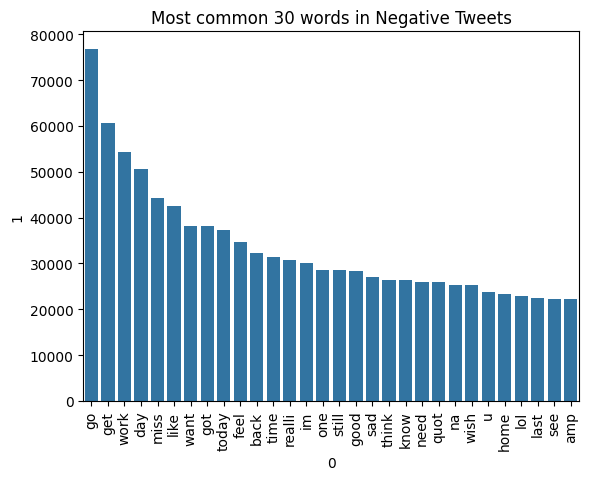

In [ ]:
sns.barplot(x=pd.DataFrame(negWords.most_common(30))[0], y=pd.DataFrame(negWords.most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title("Most common 30 words in Negative Tweets")
plt.show()

For Positive Sentiment

[]

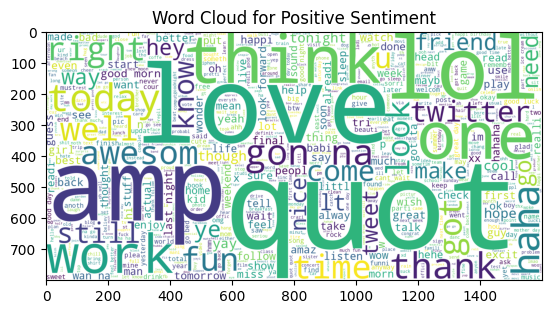

In [ ]:
posWC = wc.generate(df[df['sentiment']==1]['newTweet'].str.cat(sep=' '))
plt.imshow(posWC)
plt.title('Word Cloud for Positive Sentiment')
plt.plot()

In [ ]:
# most common 30 words in +ve tweets
posWords = nltk.FreqDist(w for t in df[df['sentiment']==1]['newTweet'] for w in t.split())
posWords.most_common(30)

[('good', 58092),
 ('love', 57983),
 ('go', 57397),
 ('day', 52194),
 ('get', 46798),
 ('quot', 46160),
 ('thank', 40831),
 ('like', 39179),
 ('lol', 35097),
 ('time', 33492),
 ('u', 31322),
 ('got', 31275),
 ('today', 29326),
 ('see', 27734),
 ('work', 27581),
 ('one', 27566),
 ('know', 26252),
 ('new', 25996),
 ('amp', 25710),
 ('great', 24389),
 ('watch', 24098),
 ('hope', 23747),
 ('think', 23641),
 ('night', 23505),
 ('back', 23009),
 ('well', 22882),
 ('look', 21272),
 ('haha', 21019),
 ('make', 20911),
 ('twitter', 19770)]

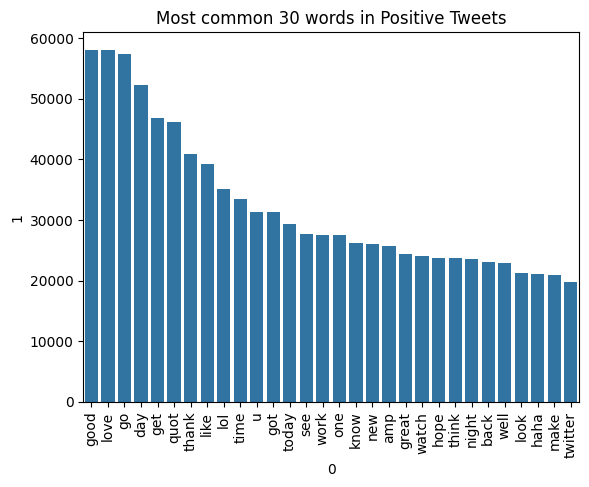

In [ ]:
sns.barplot(x=pd.DataFrame(posWords.most_common(30))[0], y=pd.DataFrame(posWords.most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title("Most common 30 words in Positive Tweets")
plt.show()

## Model Training

In [25]:
# separating feature & label
X = df['newTweet'].values
y = df['sentiment'].values

In [26]:
# splitting data into train & test
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.15, random_state=7)

In [27]:
# function for model evaluation
def modelEvaluation(model, test):
    # prediction for test data
    yPred = model.predict(test)

    # print evaluation metrics
    print(classification_report(yTest, yPred))

    # display confusion matrix
    cfMatrix = confusion_matrix(yTest, yPred)
    categories = ['Negative', 'Positive']
    groupNames = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    groupPercentages = ['{0:.2%}'.format(value) for value in cfMatrix.flatten() / np.sum(cfMatrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(groupNames, groupPercentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cfMatrix, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories)
    plt.xlabel('Predicted Values', fontdict = {'size':14})
    plt.ylabel('Actual Values', fontdict = {'size':14})
    plt.title('Confusion Matrix', fontdict = {'size':18})
    plt.show()

#### CountVectorizer

In [ ]:
# transforming train & test data using CountVectorizer
cv = CountVectorizer(ngram_range=(1,2), max_features=500000)
start = time.time()
xTrainCV = cv.fit_transform(xTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
xTestCV = cv.transform(xTest)

Training time = 74.21 seconds



Training time = 0.93 seconds

              precision    recall  f1-score   support

           0       0.81      0.78      0.79    115092
           1       0.78      0.81      0.79    112251

    accuracy                           0.79    227343
   macro avg       0.79      0.79      0.79    227343
weighted avg       0.79      0.79      0.79    227343



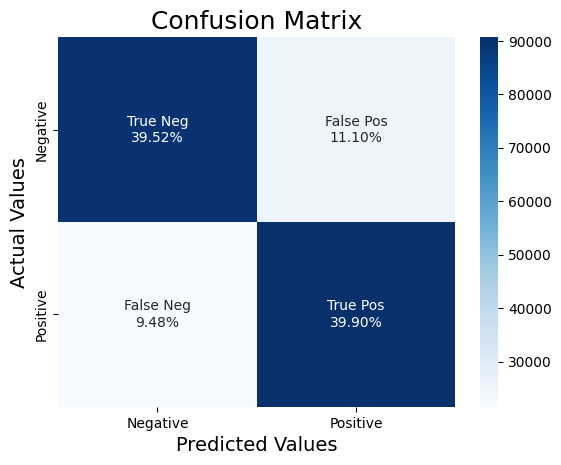

In [ ]:
# model-1: Bernoulli Naive Bayes with CountVectorizer
bnbCV = BernoulliNB()
start = time.time()
bnbCV.fit(xTrainCV, yTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(bnbCV, xTestCV)

Training time = 0.87 seconds

              precision    recall  f1-score   support

           0       0.79      0.80      0.80    115092
           1       0.80      0.79      0.79    112251

    accuracy                           0.80    227343
   macro avg       0.80      0.80      0.80    227343
weighted avg       0.80      0.80      0.80    227343



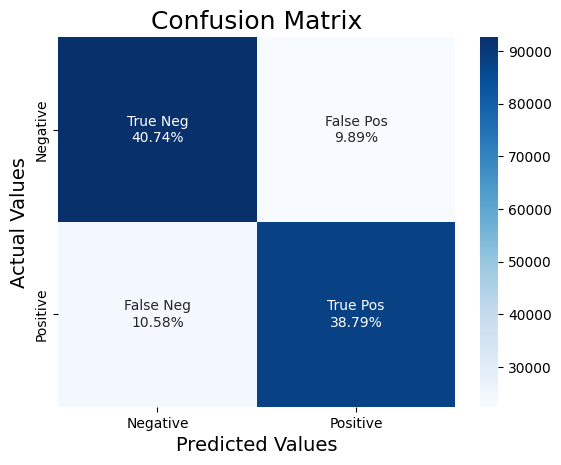

In [ ]:
# model-2: Multinomial Naive Bayes with CountVectorizer
mnbCV = MultinomialNB()
start = time.time()
mnbCV.fit(xTrainCV, yTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(mnbCV, xTestCV)

Training time = 531.09 seconds

              precision    recall  f1-score   support

           0       0.82      0.79      0.80    115092
           1       0.79      0.82      0.81    112251

    accuracy                           0.80    227343
   macro avg       0.80      0.80      0.80    227343
weighted avg       0.81      0.80      0.80    227343



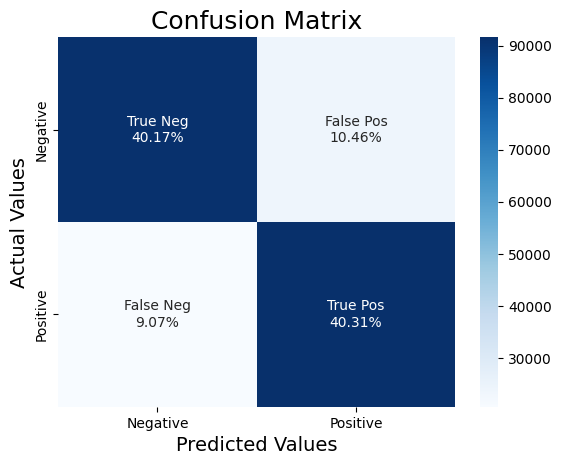

In [ ]:
# model-3: Logistic Regression with CountVectorizer
lrCV = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
start = time.time()
lrCV.fit(xTrainCV, yTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(lrCV, xTestCV)

Training time = 680.62 seconds

              precision    recall  f1-score   support

           0       0.79      0.77      0.78    115092
           1       0.77      0.79      0.78    112251

    accuracy                           0.78    227343
   macro avg       0.78      0.78      0.78    227343
weighted avg       0.78      0.78      0.78    227343



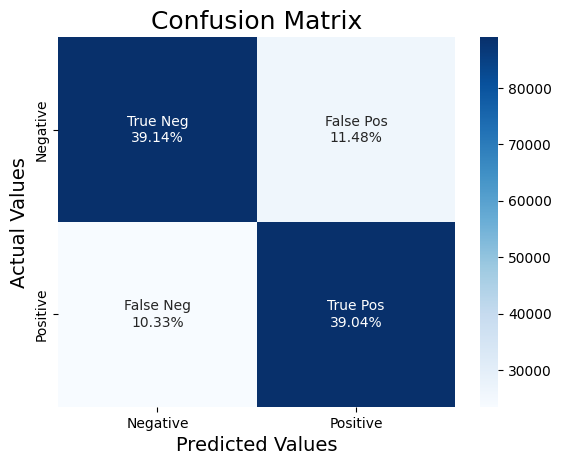

In [ ]:
# model-4: Linear SVC with CountVectorizer
svcCV = LinearSVC()
start = time.time()
svcCV.fit(xTrainCV, yTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(svcCV, xTestCV)

#### TfidfVectorizer

In [28]:
# transforming train & test data using TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
start = time.time()
xTrainTF = tfidf.fit_transform(xTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
xTestTF = tfidf.transform(xTest)

Training time = 62.11 seconds



Training time = 1.07 seconds

              precision    recall  f1-score   support

           0       0.81      0.78      0.79    115092
           1       0.78      0.81      0.79    112251

    accuracy                           0.79    227343
   macro avg       0.79      0.79      0.79    227343
weighted avg       0.79      0.79      0.79    227343



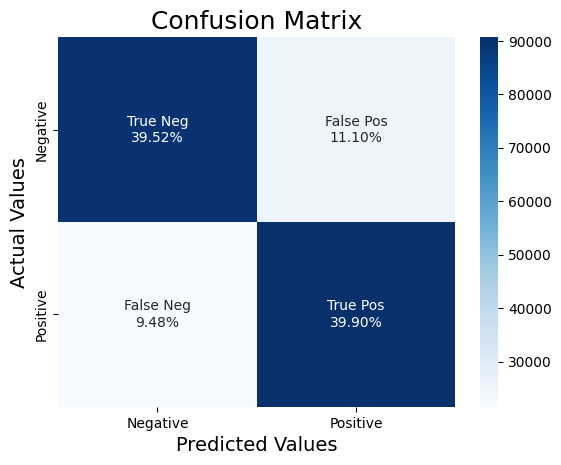

In [ ]:
# model-5: Bernoulli Naive Bayes with TfidfVectorizer
bnbTF = BernoulliNB()
start = time.time()
bnbTF.fit(xTrainTF, yTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(bnbTF, xTestTF)

Training time = 0.71 seconds

              precision    recall  f1-score   support

           0       0.79      0.81      0.80    115092
           1       0.80      0.78      0.79    112251

    accuracy                           0.80    227343
   macro avg       0.80      0.80      0.80    227343
weighted avg       0.80      0.80      0.80    227343



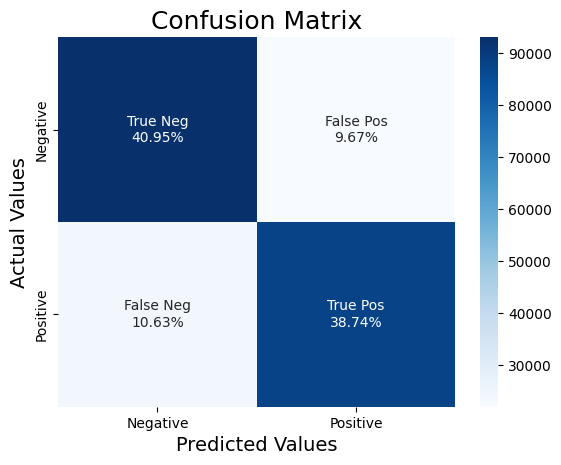

In [ ]:
# model-6: Multinomial Naive Bayes with TfidfVectorizer
mnbTF = MultinomialNB()
start = time.time()
mnbTF.fit(xTrainTF, yTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(mnbTF, xTestTF)

Training time = 22.81 seconds

              precision    recall  f1-score   support

           0       0.83      0.81      0.82    115092
           1       0.81      0.83      0.82    112251

    accuracy                           0.82    227343
   macro avg       0.82      0.82      0.82    227343
weighted avg       0.82      0.82      0.82    227343



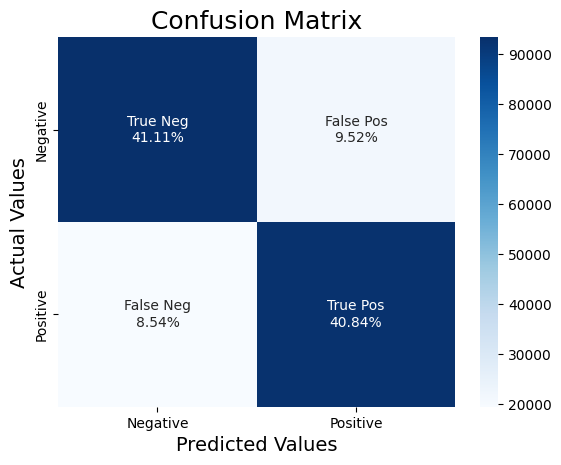

In [29]:
# model-7: Logistic Regression with TfidfVectorizer
lrTF = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
start = time.time()
lrTF.fit(xTrainTF, yTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(lrTF, xTestTF)

Training time = 52.50 seconds

              precision    recall  f1-score   support

           0       0.82      0.80      0.81    115092
           1       0.80      0.82      0.81    112251

    accuracy                           0.81    227343
   macro avg       0.81      0.81      0.81    227343
weighted avg       0.81      0.81      0.81    227343



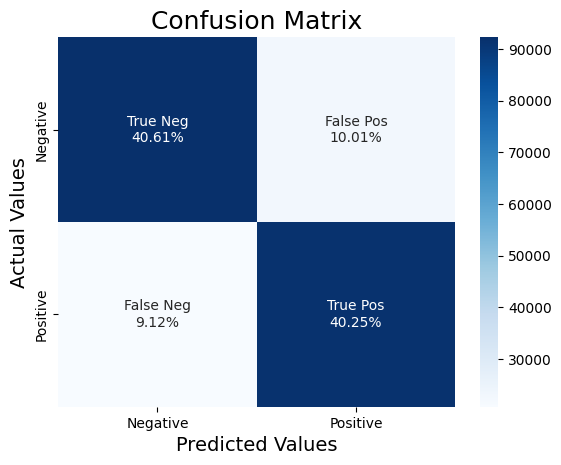

In [ ]:
# model-8: Linear SVC with TfidfVectorizer
svcTF = LinearSVC()
start = time.time()
svcTF.fit(xTrainTF, yTrain)
end = time.time()
print('Training time = {:.2f} seconds\n'.format(end-start))
modelEvaluation(svcTF, xTestTF)

## Saving the model

| ID      | Text Extraction | ML Model           | Accuracy | f1-score (class 0) | f1-score (class 1) | Training Time |
|---------|-----------------|--------------------|----------|--------------------|--------------------|---------------|
| Model-1 | CountVectorizer | BernoulliNB        | 0.79     | 0.79               | 0.79               | 0.93 sec      |
| Model-2 | CountVectorizer | MultinomialNB      | 0.8      | 0.8                | 0.79               | 0.87 sec      |
| Model-3 | CountVectorizer | LogisticRegression | 0.8      | 0.8                | 0.81               | 531.09 sec    |
| Model-4 | CountVectorizer | LinearSVC          | 0.78     | 0.78               | 0.78               | 680.62 sec    |
| Model-5 | TfidfVectorizer | BernoulliNB        | 0.79     | 0.79               | 0.79               | 1.07 sec      |
| Model-6 | TfidfVectorizer | MultinomialNB      | 0.8      | 0.8                | 0.79               | 0.71 sec      |
| Model-7 | TfidfVectorizer | LogisticRegression | 0.82     | 0.82               | 0.82               | 22.81sec    |
| Model-8 | TfidfVectorizer | LinearSVC          | 0.81     | 0.81               | 0.81               | 52.5 sec      |


Saving **model-7:** *Logistic Regression with TfidfVectorizer*

In [30]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(lrTF, open('model.pkl', 'wb'))